# Chapter 3: Maximizing and Minimizing

### We will be covering gradient ascent & descent (traversal) for optimization 

In [8]:
import matplotlib.pyplot as plt
import math
from scipy.linalg import sqrtm
import numpy as np

In [5]:
# set up plot format

SMALL_SIZE = 12
MEDIUM_SIZE = 18
BIGGER_SIZE = 26
CHONK_SIZE = 32
font = {'family' : 'DIN Condensed',
        'weight' : 'bold',
        'size'   : SMALL_SIZE}
plt.rc('font', **font)
plt.rc('axes', titlesize=BIGGER_SIZE, labelsize=MEDIUM_SIZE, facecolor="xkcd:white")
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=CHONK_SIZE, facecolor="xkcd:white", edgecolor="xkcd:black") #  powder blue

In [10]:
revenue = lambda tax: 100 * (math.log(tax + 1) - (tax - 0.2)**2 + 0.04)
first_derivative_revenue = lambda tax: (100 / (tax + 1)) - 200 * tax + 40

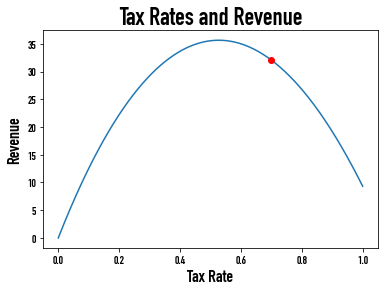

In [12]:
xs = [x/1000 for x in range(1001)]
ys = [revenue(x) for x in xs]
dys = [first_derivative_revenue(x) for x in xs]
plt.plot(xs,ys)
# plt.plot(xs,dys)
current_rate = 0.7
plt.plot(current_rate,revenue(current_rate),'ro')
plt.title('Tax Rates and Revenue')
plt.xlabel('Tax Rate')
plt.ylabel('Revenue')
plt.savefig("tax_rates_and_revenue.png", dpi = 400)

## Gradient Traversal Steps

1. Start somewhere on a curve
2. Take a step in one direction
3. If you moved less than threshold
3. If you find yourself going the right direction, repeat step 2
4. Else, repeat step 2 but in the other direction

In [7]:
def gradient_descent(start, gradient, learn_rate, max_iter, tol=0.01):
  """
  Credit: Robert Kwiatkowski on Medium
  """
  steps = [start] # history tracking
  x = start

  for _ in range(max_iter):
    diff = learn_rate*gradient(x)
    if abs(diff)<tol:
      break    
    x = x - diff
    steps.append(x) # history tracing

  return steps, x

df = lambda x: (x + 10)**2
gradient_descent(0, df, 1, 20)



([0,
  -100,
  -8200,
  -67084300,
  -4500302031888400,
  -20252718378218776104731448680500,
  -410172601707440572557971589875869064610540321970215293555320600,
  -168241563191450680898537024308131628447885486994777537422995633998657738457104605412468520116391629012196009150161991233268700,
  -28305223585102892620221589982451566984920480398257062507852816793038135939648182712734048008231784799302300061016919628041843326566167711604076865207421922526957426053994976039590613409530971557889572939390251984678779610004708652692061299852967584800,
  -80118568220266504946624778028627172423132653585724282038418478017548015619153050535318510035513151888214741328264020935917630091167765765163126983055929101204199317469561735045323104047483392532358027939521962388334794357276112891048681191472516109377810510557999334316878320090979327111360928710477418018709696695693067368207501772535990199954029884492848338039134262002177528931706977163861147412157343611709950675836489303789947678744399367502039